# Lab 2

### Authors: Jason Lin, Jason Lingle, Jonathan Marin

# Data Preparation Part 1

- [X] Define and prepare your class variables.
- [X] Use proper variable representations (int, float, one-hot, etc.)
- [ ] Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.
- [ ] Remove variables that are not needed/useful for the analysis.




In [12]:

#Load Packages
import pandas as pd 
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()


train = pd.DataFrame(pd.read_csv("train.csv"))
test = pd.DataFrame(pd.read_csv("test.csv"))


print (train.shape)
print(test.shape)


(9557, 143)
(23856, 142)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,0.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,0.0,0,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,4


<b> Note that the Kaggle competition provided a test set that did not include the target variable for us to validate so we can not use it to validate our model before submitting the test set to kaggle.  Therefore, we can only validate our model with the train set itself.  Rather than splitting the train set into train/test, we will choose to use cross validation so that we do not have to train the model to a smaller data set.  

## Defined Explanatory Variables


Variable Name | Definition | Variable Type
----------|------------|------------------|
v2a1 |  Monthly rent payment | float
hacdor |  =1 Overcrowding by bedrooms | bool
rooms |   number of all rooms in the house | int
hacapo |  =1 Overcrowding by rooms | bool
v14a |  =1 has bathroom in the household | bool
refrig |  =1 if the household has refrigerator | bool
v18q |  owns a tablet | bool
v18q1 |  number of tablets household owns | int
r4h1 |  Males younger than 12 years of age | int
r4h2 |  Males 12 years of age and older | int
r4h3 |  Total males in the household | int
r4m1 |  Females younger than 12 years of age | int
r4m2 |  Females 12 years of age and older | int
r4m3 |  Total females in the household | int
r4t1 |  persons younger than 12 years of age | int
r4t2 |  persons 12 years of age and older | int
r4t3 |  Total persons in the household | int
tamhog |  size of the household | int
tamviv |  number of persons living in the household | int
escolari |  years of schooling | int
rez_esc |  Years behind in school | int
hhsize |  household size | int
paredblolad |  =1 if predominant material on the outside wall is block or brick | bool
paredzocalo |  "=1 if predominant material on the outside wall is socket (wood   zinc or absbesto" | bool
paredpreb |  =1 if predominant material on the outside wall is prefabricated or cement | bool
pareddes |  =1 if predominant material on the outside wall is waste material | bool
paredmad |  =1 if predominant material on the outside wall is wood | bool
paredzinc |  =1 if predominant material on the outside wall is zink | bool
paredfibras |  =1 if predominant material on the outside wall is natural fibers | bool
paredother |  =1 if predominant material on the outside wall is other | bool
pisomoscer |  "=1 if predominant material on the floor is mosaic, ceramic, terrzo | bool
pisocemento |  =1 if predominant material on the floor is cement | bool
pisoother |  =1 if predominant material on the floor is other | bool
pisonatur |  =1 if predominant material on the floor is  natural material | bool
pisonotiene |  =1 if no floor at the household | bool
pisomadera |  =1 if predominant material on the floor is wood | bool
techozinc |  =1 if predominant material on the roof is metal foil or zink | bool
techoentrepiso |  "=1 if predominant material on the roof is fiber cement   mezzanine | bool
techocane |  =1 if predominant material on the roof is natural fibers | bool
techootro |  =1 if predominant material on the roof is other | bool
cielorazo |  =1 if the house has ceiling | bool
abastaguadentro |  =1 if water provision inside the dwelling | bool
abastaguafuera |  =1 if water provision outside the dwelling | bool
abastaguano |  =1 if no water provision | bool
public |  "=1 electricity from CNFL   ICE  ESPH/JASEC | bool
planpri |  =1 electricity from private plant | bool
noelec |  =1 no electricity in the dwelling | bool
coopele |  =1 electricity from cooperative | bool
sanitario1 |  =1 no toilet in the dwelling | bool
sanitario2 |  =1 toilet connected to sewer or cesspool | bool
sanitario3 |  =1 toilet connected to  septic tank | bool
sanitario5 |  =1 toilet connected to black hole or letrine | bool
sanitario6 |  =1 toilet connected to other system | bool
energcocinar1 |  =1 no main source of energy used for cooking (no kitchen) | bool
energcocinar2 |  =1 main source of energy used for cooking electricity | bool
energcocinar3 |  =1 main source of energy used for cooking gas | bool
energcocinar4 |  =1 main source of energy used for cooking wood charcoal | bool
elimbasu1 |  =1 if rubbish disposal mainly by tanker truck | bool
elimbasu2 |  =1 if rubbish disposal mainly by botan hollow or buried | bool
elimbasu3 |  =1 if rubbish disposal mainly by burning | bool
elimbasu4 |  =1 if rubbish disposal mainly by throwing in an unoccupied space | bool
elimbasu5 |  "=1 if rubbish disposal mainly by throwing in river | bool
elimbasu6 |  =1 if rubbish disposal mainly other | bool
epared1 |  =1 if walls are bad | bool
epared2 |  =1 if walls are regular | bool
epared3 |  =1 if walls are good | bool
etecho1 |  =1 if roof are bad | bool
etecho2 |  =1 if roof are regular | bool
etecho3 |  =1 if roof are good | bool
eviv1 |  =1 if floor are bad | bool
eviv2 |  =1 if floor are regular | bool
eviv3 |  =1 if floor are good | bool
dis |  =1 if disable person | bool
male |  =1 if male | bool
female |  =1 if female | bool
estadocivil1 |  =1 if less than 10 years old | bool
estadocivil2 |  =1 if free or coupled uunion | bool
estadocivil3 |  =1 if married | bool
estadocivil4 |  =1 if divorced | bool
estadocivil5 |  =1 if separated | bool
estadocivil6 |  =1 if widow/er | bool
estadocivil7 |  =1 if single | bool
parentesco1 |  =1 if household head | bool
parentesco2 |  =1 if spouse/partner | bool
parentesco3 |  =1 if son/doughter | bool
parentesco4 |  =1 if stepson/doughter | bool
parentesco5 |  =1 if son/doughter in law | bool
parentesco6 |  =1 if grandson/doughter | bool
parentesco7 |  =1 if mother/father | bool
parentesco8 |  =1 if father/mother in law | bool
parentesco9 |  =1 if brother/sister | bool
parentesco10 |  =1 if brother/sister in law | bool
parentesco11 |  =1 if other family member | bool
parentesco12 |  =1 if other non family member | bool
idhogar |  Household level identifier | string
hogar_nin |  Number of children 0 to 19 in household | int
hogar_adul |  Number of adults in household | int
hogar_mayor |  # of individuals 65+ in the household | int
hogar_total |  # of total individuals in the household | int
dependency |  Dependency rate,  calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64) | numeric
edjefe |  years of education of male head of household,  based on the interaction of escolari (years of education)  head of household and gender,  yes=1 and no=0 | bool
edjefa |  years of education of female head of household , based on the interaction of escolari (years of education) , head of household and gender,  yes=1 and no=0 | bool
meaneduc | average years of education for adults (18+) | int
instlevel1 |  =1 no level of education | bool
instlevel2 |  =1 incomplete primary | bool
instlevel3 |  =1 complete primary | bool
instlevel4 |  =1 incomplete academic secondary level | bool
instlevel5 |  =1 complete academic secondary level | bool
instlevel6 |  =1 incomplete technical secondary level | bool
instlevel7 |  =1 complete technical secondary level | bool
instlevel8 |  =1 undergraduate and higher education | bool
instlevel9 |  =1 postgraduate higher education | bool
bedrooms |  number of bedrooms | int
overcrowding |  # persons per room | int
tipovivi1 |  =1 own and fully paid house | bool
tipovivi2 |  "=1 own paying in installments | bool
tipovivi3 |  =1 rented | bool
tipovivi4 |  =1 precarious | bool
tipovivi5 |  "=1 other(assigned   borrowed)" | bool
computer |  =1 if the household has notebook or desktop computer | bool
television |  =1 if the household has TV | bool
mobilephone |  =1 if mobile phone | bool
qmobilephone |  # of mobile phones | int
lugar1 |  =1 region Central | bool
lugar2 |  =1 region Chorotega | bool
lugar3 |  =1 region PacÃƒÂ­fico central | bool
lugar4 |  =1 region Brunca | bool
lugar5 |  =1 region Huetar AtlÃƒÂ¡ntica | bool
lugar6 |  =1 region Huetar Norte | bool
area1 |  =1 zona urbana | bool
area2 |  =2 zona rural | bool
age |  Age in years | int
SQBescolari |  escolari squared | numeric
SQBage |  age squared | numeric
SQBhogar_total |  hogar_total squared | int
SQBedjefe |  edjefe squared | int
SQBhogar_nin |  hogar_nin squared | int
SQBovercrowding |  overcrowding squared | float
SQBdependency |  dependency squared | float
SQBmeaned |  square of the mean years of education of adults (>=18) in the household | bool
agesq |  Age squared | numeric


## Prepocessing, Reduction, Scaling



### Prepping the Data

Below is all the data prep (outside of rubric) that needed to be done. 

In [13]:
#Data Preparation Part 1 Code

#Find the Nulls
null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()




v2a1       6860
v18q1      7342
rez_esc    7928
dtype: int64

In [14]:
train.loc[(train.tipovivi1 == 1),'v2a1'] = 0
test.loc[(test.tipovivi1 == 1),'v2a1'] = 0


train.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0

train.loc[np.isnan(train["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0


train.loc[(train.dependency == "yes"),'dependency'] = 1
train.loc[(train.dependency == "no"),'dependency'] = 0

test.loc[(test.dependency == "yes"),'dependency'] = 1
test.loc[(test.dependency == "no"),'dependency'] = 0


train.loc[(train.edjefe == "yes"),'edjefe'] = 1
train.loc[(train.edjefe == "no"),'edjefe'] = 0

test.loc[(test.edjefe == "yes"),'edjefe'] = 1
test.loc[(test.edjefe == "no"),'edjefe'] = 0



train.loc[(train.edjefa == "yes"),'edjefa'] = 1
train.loc[(train.edjefa == "no"),'edjefa'] = 0

test.loc[(test.edjefa == "yes"),'edjefa'] = 1
test.loc[(test.edjefa == "no"),'edjefa'] = 0


null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()

v2a1        949
rez_esc    7928
dtype: int64

In [15]:
#Denormalization  -- This had to happen to prep the data

#Create subset dataframes for head of househoold for tain and test
train_head = train[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned','Target']]

train_head = train_head[train_head['parentesco1'] == 1]

test_head = test[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']]

test_head = test_head[test_head['parentesco1'] == 1]

#Start the member level denormalization for train and test
train_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from train "
"group by idhogar "
))



test_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from test "
"group by idhogar "
))



#Join the household and member aggregation together
train_model_set = pd.DataFrame(pd.merge(train_head, train_member_agg, on = 'idhogar', how = 'left'))
test_model_set = pd.DataFrame(pd.merge(test_head, test_member_agg, on = 'idhogar', how = 'left'))




# For the rest of the v2a1 that are null, we will use the mean

train_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

test_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

#Export final model csvs for review
train_model_set.to_csv("train_model_set.csv")
test_model_set.to_csv("test_model_set.csv")

#Make sure all Nulls are accounted for
null_columns=train_model_set.columns[train_model_set.isnull().any()]

train_model_set[null_columns].isnull().sum()



Series([], dtype: float64)

### Feature Selection

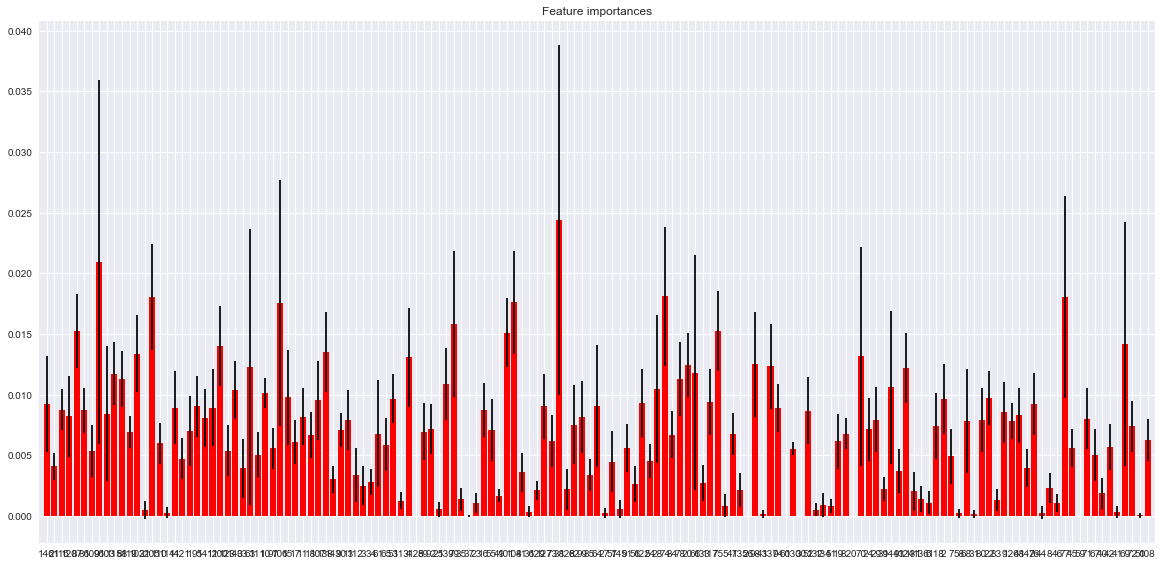

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import numpy as np

X = train_model_set.drop(['Target','Id', 'idhogar'], axis = 1)
y = train_model_set.Target

# Feature selection
clf = ExtraTreesClassifier(random_state=0)
clf = clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances[::-1])
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

sfm = SelectFromModel(clf, prefit=True, threshold='0.5*mean')
n_features = sfm.transform(X).shape[1]

#print('Number of features selected:')
#print(n_features)

# See what features get selected
#ft = list(zip(X.columns, sfm.get_support()))

#print('Features selected:')
#print(ft)

selected = [x[0] for x in ft if x[1] == True]

X_selected = X[selected]

#print('Shape of X with reduced feature:')
#print(np.shape(X_selected))

#print(clf.feature_importances_)

#We Can fit models on X_selected now instead of train_model_set


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# Plot the feature importances of the forest

fig = plt.figure()
#fig.suptitle('Model 1', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Model 1 LR',fontsize=25, fontweight='bold')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
                          

# Defined Class Variable

In [22]:
#Collapsing the Class Variable
train_model_set['Target_new']=((train_model_set.Target > 3).astype(int))
target_cnt = train_model_set['Target'].value_counts()
target_newcnt = train_model_set['Target_new'].value_counts()

train_model_set.to_csv("train_model_set_wTargetnew.csv")

#Check
train_model_set[['Target','Target_new']].describe()
print(target_cnt)
print(target_newcnt)

4    1954
2     442
3     355
1     222
Name: Target, dtype: int64
1    1954
0    1019
Name: Target_new, dtype: int64


From previous exploratory analysis in the confusion matrix, the models have trouble predicting the poverty levels 1 (extreme), 2 (moderate), and 3 (vulnerable). However, there is a high amount of predictability in poverty level 4 (non-vulnerable). This could indicate that there is some skewness in the data making it difficult to get higher accuracy in the other levels. Also when looking at one vs. one comparison in SVM, there are some erroneous relationships especially when comparing poverty level 3 vs. 4 and povery level 1 vs. 2. This could indicate that the these two groups maybe similar in nature or there is an oversampling of the higher poverty levels making it difficult to differentiate at that level of granularity. When looking at the frequency we can clearly see that poverty level 4 accounts for majority of the data set. Therefore, it maybe needed to collapse certain levels to help increase the predictability of other levels. Therefore, collapsing poverty level 1, 2, and 3 could help balance the dataset and increase the size of the lower levels.  

# Removing Variables

In the previous analysis done with logistic regression and SVM, some variables were dropped because it did not increase the accuracy and confusion matrix accuracy criteria in the previous analysis. Therefore, a manual iterative drop of variables were done to see if this would increase or decrease the fit statistic. When looking at importance features once scaled in Linear SVM and Logistic Regression, we can see that a lot of the variables that comes up as important are the amount of education, household size, and number of dependents. The many features that did not come up as important are luxury items such computers and tablets, wall materials, structure of the house in terms of bathroom and flooring, and gender. Therefore, based on logic and intutition some variables were dropped according to this understanding 

# Data Preparation Part 2 
- [ ] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

# Features Used











# New Features 

New Field Name|Definition|Variable Type
--------------------------------------------------------|----------|--------------|
JM_1YrBehindSchool|Count of individuals when rez_esc Count of  1|int
JM_2YrBehindSchool|Count of individuals when rez_esc Count of  2|int
JM_3YrBehindSchool|Count of individuals when rez_esc Count of  3|int
JM_4YrBehindSchool|Count of individuals when rez_esc Count of  4|int
JM_5YrBehindSchool|Count of individuals when rez_esc Count of  5|int
JM_estadocivil1| Count of children 1 if less than 10 years old|int
JM_estadocivil2| Count of people if free or coupled uunion|int
JM_estadocivil3| Count of people if married|int
JM_estadocivil4| Count of people if divorced|int
JM_estadocivil5| Count of people if separated|int
JM_estadocivil6| Count of people if widow/er|int
JM_estadocivil7| Count of people if single|int
JM_instlevel1| Count of people no level of education|int
JM_instlevel2| Count of people incomplete primary|int
JM_instlevel3| Count of people complete primary|int
JM_instlevel4| Count of people incomplete academic secondary level|int
JM_instlevel5| Count of people complete academic secondary level|int
JM_instlevel6| Count of people incomplete technical secondary level|int
JM_instlevel7| Count of people complete technical secondary level|int
JM_instlevel8| Count of people undergraduate and higher education|int
JM_instlevel9| Count of people postgraduate higher education|int
JM_mobilephone| Count of people if mobile phone|int
JM_parentesco1| Count of people if household head|int
JM_parentesco10| Count of people if brother/sister in law|int
JM_parentesco11| Count of people if other family member|int
JM_parentesco12| Count of people if other non family member|int
JM_parentesco2| Count of people if spouse/partner|int
JM_parentesco3| Count of people if son/doughter|int
JM_parentesco4| Count of people if stepson/doughter|int
JM_parentesco5| Count of people if son/doughter in law|int
JM_parentesco6| Count of people if grandson/doughter|int
JM_parentesco7| Count of people if mother/father|int
JM_parentesco8| Count of people if father/mother in law|int
JM_parentesco9| Count of people if brother/sister|int
JM_People_Educ_LT10|Count of individuals when schooling (escolari) < 10|int
JM_People_Educ_LT15|Count of individuals when schooling (escolari) < 15|int
JM_People_Educ_LT20|Count of individuals when schooling (escolari) < 20|int
JM_People_Educ_LT25|Count of individuals when schooling (escolari) < 25|int
JM_People_Educ_LT5|Count of individuals when schooling (escolari) < 5|int
JM_Sum_of_Disabled|Sum of dis for total number of disabled individuals per household|int
JM_Sum_Of_Females|Sum of male for total number of females per household|int
JM_Sum_Of_Males|Sum of male for total number of males per household|int
JM_Sum_of_Tablets|Sum of v18q for total tablets per household|int
Total Sum Years of Schooling|Sum of escolari for total years of schooling per household|int


# Modeling and Evaluation 1

- [ ] Choose and explain your evaluation metrics that you will use (i.e., accuracy,precision, recall, F-measure, or any metric we have discussed).

- [ ] Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.


 

In [ ]:
#Modeling and Evalutaiton 1 Code

# Modeling and Evaluation 2

- [ ] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.




In [ ]:
#Modeling and Evaluation 2 Code

# do cv since training set was small and test set from kaggle didn't have targets provided.  We would have needed to 
#split train into train/test, but then we would have even a smaller sample, so we should do CV



# Modeling and Evaluation 3

- [ ] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. 
- [ ] You must investigate different parameters of the algorithms!

In [ ]:
#Modeling and Evaluation 3 Code

#logistic Regression

#Random Forest 

#KNN





# Modeling and Evaluation 4

- [ ] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. - 

- [ ] Explain any visuals and analyze why they are interesting to someone that might use this model.





In [ ]:
#Modeling and Evaluation 4 Code

# ROC Curve good visual accuracy, precision, recall

# Business visual? Graph of accuracy, precision, recall? 



# Modeling and Evaluation 5

- [ ] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? 

- [ ] Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course. 



In [ ]:
#Modeling and Evaludation 6 Code

#7.5 for confidence intervals.  To be signficant there can't be a zero. Example in notebook pooh bear for this. 


# Modeling and Evaluation 6

- [ ] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. 

- [ ] Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

In [ ]:
#Modeling and Evaluation 6 Code

#Add visuals for the importance! 
#Explain importance features.  Like, if you broke, then don't buy a phone. 


# Deployment

- [ ] How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? 
- [ ] How would you measure the model's value if it was used by these parties? 
- [ ] How would your deploy your model for interested parties? 
- [ ] What other data should be collected? 
- [ ] How often would the model need to be updated, etc.? 


In [ ]:
#Deployment Code (if needed)




# Exceptional Work

- [ ] You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?


In [ ]:
#Exceptional Work Code


#XGBOOST - for exceptional work. why? every kaggle competition won for classification is done with this since 2016

#Parallel Processing in Python for these models not a bad idea. 